In [1]:
## 1st step: import necessary libreries
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## 2nd step: assign and resize image
originalImage = cv2.imread("image.jpg", cv2.IMREAD_GRAYSCALE)
originalImage = cv2.resize(originalImage, (512, 512))

In [3]:
## 4th step:Power-law Transform: r = c * r^gamma
def powerLawTransform(image, gamma):
    if gamma < 0:
        c = 255 / np.max(image) ** -gamma   # c: scalling range: for normalization
    else:
        c = 1
    return c * image ** gamma

In [4]:
## 5th step: Logarithmic Transform: r = c * log(1 + r)
def logTransform(image):
    c = 255 / np.log(1 + np.max(image))
    return c * np.log(1 + image) # T(x)=c * log(1+x)

## Inverse Logarithmic Transform: r = c * (exp(r) - 1)
def inverseLogTransform(image):
    c = 255 / (np.exp(1) - 1)
    return c * np.exp(image / 255) - 1

Text(0.5, 1.0, 'Inverse Log Transform Image Histogram')

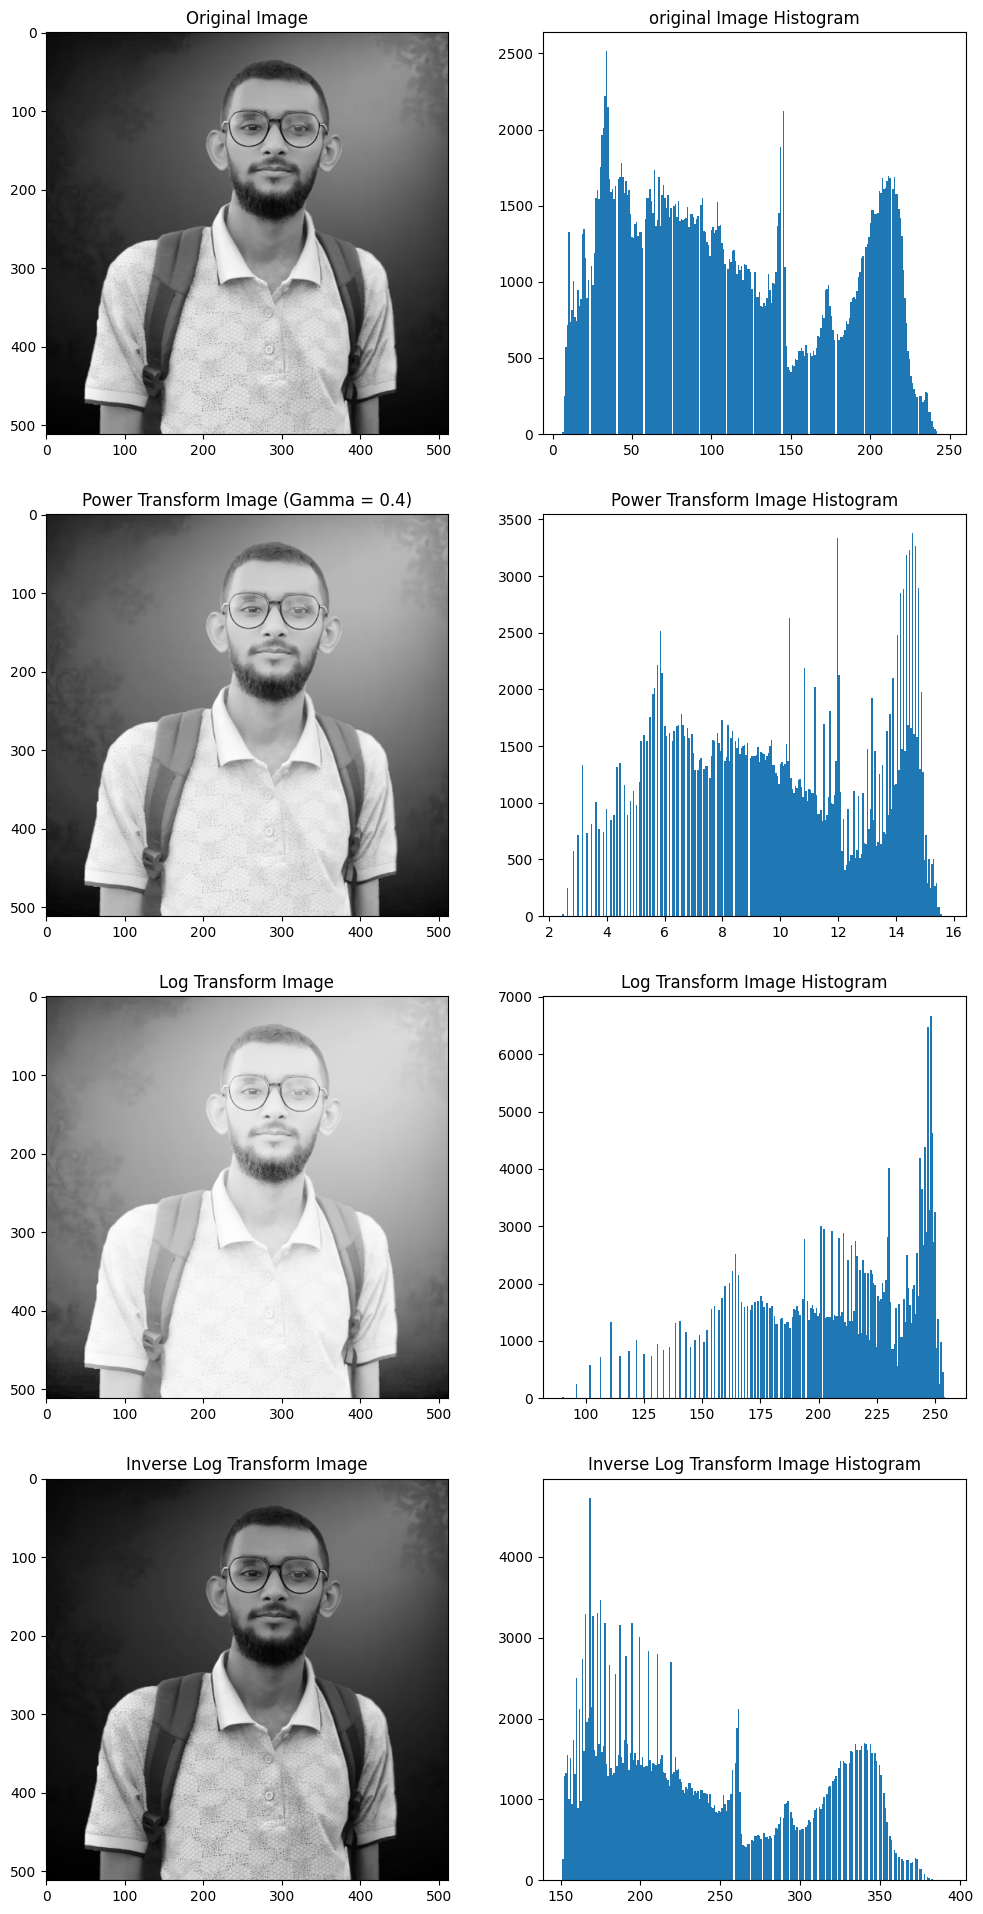

In [5]:
## 3rd step: show image in ploats
plt.figure(figsize=(12, 24))

# Original Image Visualization & Histogram
plt.subplot(4, 2, 1)
plt.imshow(originalImage, cmap='gray')
plt.title("Original Image")

plt.subplot(4, 2, 2)
plt.title("original Image Histogram")
plt.hist(originalImage.ravel(), 256)

# Power-law Transform Image Visualization & Histogram
powerLawTransformedImage = powerLawTransform(originalImage, 0.5)
plt.subplot(4, 2, 3)
plt.imshow(powerLawTransformedImage, cmap='gray')
plt.title("Power Transform Image (Gamma = 0.4)")

plt.subplot(4, 2, 4)
plt.title("Power Transform Image Histogram")
plt.hist(powerLawTransformedImage.ravel(), 256)

# Logarithmic Transform Image Visualization & HistogramL
logTransformedImage = logTransform(originalImage)
plt.subplot(4, 2, 5)
plt.imshow(logTransformedImage, cmap='gray')
plt.title("Log Transform Image")

plt.subplot(4, 2, 6)
plt.title("Log Transform Image Histogram")
plt.hist(logTransformedImage.ravel(), 256)

# Inverse Logarithmic Transform Image Visualization & Histogram
inverseLogTransformedImage = inverseLogTransform(originalImage)
plt.subplot(4, 2, 7)
plt.imshow(inverseLogTransformedImage, cmap='gray')
plt.title("Inverse Log Transform Image")

plt.subplot(4, 2, 8)
plt.hist(inverseLogTransformedImage.ravel(), 256)
plt.title("Inverse Log Transform Image Histogram")
